# Aula XxX - Medidas de Tendência Central

Assuntos:
- Média
- Mediana

Depêndencias: 
- [Numpy](http://www.numpy.org/)
- [Scikit learn](https://scikit-learn.org/)
- [Scipy](https://www.scipy.org/)

## Baixando depêndencias

In [2]:
!pip install numpy scikit-learn scipy

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Importando bibliotecas

In [26]:
import numpy as np
from scipy import stats
from sklearn import datasets
from matplotlib import pyplot as plt

## Formatar 
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# Medidas de Tendência Central

## Média

Considere o vetor de dados $\mathbf{x}$. Note que preferimos sempre trabalhar com o tipo $\texttt{numpy array}$.
Numpy é uma biblioteca de programação numérica com diversas funções já implmentadas.

In [6]:
x = np.array([1, 3, 4, 2, 7, 6, 8])

Para calcular a média dos valores de $\mathbf{x}$, basta fazer:

In [23]:
## Usando loop:
acc = 0
for xi in x:
    acc += xi
mu_l = acc / len(x)

##Usando função python
mu_f = sum(x) / len(x)

## Numpy
mu_n = np.mean(x)

mu_l == mu_f == mu_n

True

Considere agora uma matriz $A$:

In [14]:
A = np.array([[1, 2, 3],[1, 2, 2],[3, 2, 1],[1, 1, 1]])
A

array([[1, 2, 3],
       [1, 2, 2],
       [3, 2, 1],
       [1, 1, 1]])

Como demonstrado na documentação da função [mean](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.mean.html), o parametro axis calcula a média em cada eixo e caso seja passado uma lista, calcula em multiplos eixos e em caso de None, que também é o valor padrão, calcula de todo o nd-array:

Média total:

In [30]:
## axis = None
np.mean(A)

1.6666666666666667

Média por coluna: 

In [29]:
## axis = 0 (Coluna)
np.mean(A, axis=0)

array([ 1.500,  1.750,  1.750])

Média por linha:

In [31]:
## axis = 0 (Coluna)
np.mean(A, axis=0)

array([ 1.500,  1.750,  1.750])

## Moda

Um outro tipo de medida de tendência central é a _moda_, que é o valor mais frequente do vetor de dados. Por exemplo:

In [37]:
y = np.array([2, 4, 6, 2, 5, 6, 2, 9, 4, 5, 2, 1])

### Com numpy

In [38]:
counts = np.bincount(y)
np.argmax(counts), counts

(2, array([0, 1, 4, 0, 2, 2, 2, 0, 0, 1], dtype=int64))

### Com scipy

In [40]:
stats.mode(y)

ModeResult(mode=array([2]), count=array([4]))

O resultado acima nos dá o valor mais frequente (2) e sua frequência (4).

Voltando ao exemplo da matriz $A$:

temos:

In [41]:
A, stats.mode(A)

(array([[1, 2, 3],
        [1, 2, 2],
        [3, 2, 1],
        [1, 1, 1]]),
 ModeResult(mode=array([[1, 2, 1]]), count=array([[3, 3, 2]])))

ou seja, o número 1 é o valor mais frequente da primeira coluna, aparecendo nela 3 vezes; 

o número 2 é o valor mais frequente da segunda coluna, aparecendo 3 vezes; e

o número 1 é o valor mais frequente da primeira coluna, aparecendo 2 vezes.

Para o cálculo por linhas, fazemos:

In [18]:
stats.mode(A, axis=1)

ModeResult(mode=array([[1],
       [2],
       [1],
       [1]]), count=array([[1],
       [2],
       [1],
       [3]]))

## Mediana

Se ordenamos os vetores $\mathbf{x}$ e $\mathbf{y}$, obteremos:

In [19]:
np.sort(x)

array([1, 2, 3, 4, 6, 7, 8])

In [20]:
np.sort(y)

array([1, 2, 2, 2, 2, 4, 4, 5, 5, 6, 6, 9])

Agora, é fácil ver que:

In [21]:
np.median(x)

4.0

In [22]:
np.median(y)

4.0

Para vermos que a mediana é menos sensível a valores extremos, façamos:

In [23]:
z = np.array([1, 3, 4, 2, 237, 6, 8])

E calculemos:

In [24]:
np.mean(z)

37.285714285714285

e

In [25]:
np.median(z)

4.0

Notemos que $4.0$ representa bem melhor a tendência central do vetor $\mathbf{z}$ que $37.29$.

## Média x Mediana

Agora, consideremos um exemplo mais real do uso da média e da mediana.

Vamos isolar o fundo das seguintes imagens:

In [26]:
img = []
for i in range(1,7):
    file = '../figuras/walking_man_0' + str(i) + '.jpg'
    img.append(plt.imread(file,0))
    img[i-1] = img[i-1].astype(float)
    img[i-1] = img[i-1]/255.0
    plt.subplot(2, 3, i)
    plt.imshow(img[i-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])

Uma ideia é calcular a média das imagens, o que nos dá:

([], <a list of 0 Text yticklabel objects>)

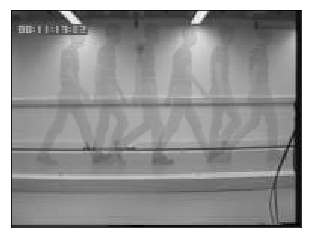

In [27]:
avg_img = img[0].copy()
for i in range(1,6):
    avg_img += img[i]
avg_img = avg_img/6.0
plt.imshow(avg_img, cmap='gray')
plt.xticks([])
plt.yticks([])

Conseguimos um resultado razoável, mas precisaríamos de muitas imagens para reduzir os "fantasmas".

Vejamos o que acontece quando aplicamos a mediana:

([], <a list of 0 Text yticklabel objects>)

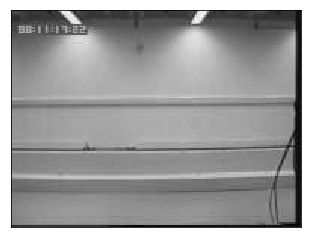

In [28]:
median_img = np.median(img,axis=0)
plt.imshow(median_img, cmap='gray')
plt.xticks([])
plt.yticks([])

   ## Banco de Dados Iris

Vamos calcular algumas medidas de tendência central com o banco de dados Iris.

In [29]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

As médias de cada característica por espécie são:

In [30]:
mu_setosa = np.mean(X[0:50,:], axis=0)
mu_versicolor = np.mean(X[50:100,:], axis=0)
mu_virginica = np.mean(X[100:150,:], axis=0)
print('Médias da Iris setosa     =', mu_setosa)
print('Médias da Iris versicolor =', mu_versicolor)
print('Médias da Iris virginica  =', mu_virginica)

Médias da Iris setosa     = [ 5.006  3.418  1.464  0.244]
Médias da Iris versicolor = [ 5.936  2.770  4.260  1.326]
Médias da Iris virginica  = [ 6.588  2.974  5.552  2.026]


Assim, a espécie Iris viginica possui, em média, maiores comprimento de sépala, comprimento e largura de pétala, enquanto que a setosa possui maior largura de sépala que as outras espécies.

Vejamos alguns gráficos.

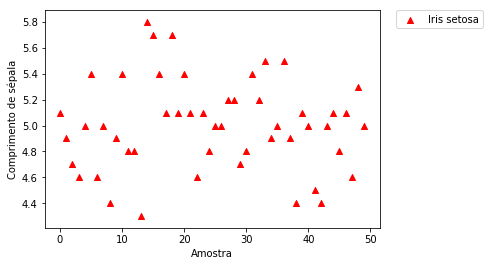

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
eixo_x = range(50)
ax1.scatter(eixo_x, X[0:50,0], c='r', marker='^', label="Iris setosa")
ax1.set_xlabel('Amostra')
ax1.set_ylabel('Comprimento de sépala')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Note que esse tipo de gráfico pouco nos informa sobre as tendências dos dados.<br>
Para visualizarmos tendências, usamos o conceito de histograma.

## Histograma

O histograma é um gráfico de frequência de dados.<br>
No eixo das abscissas, estão os valores dos quais se quer a frequência;<br>
no eixo das ordenadas, estão as frequência, i.e., o números de exemplares numa determinada faixa de valores.<br>
É comum usar "caixas" (<em>bins</em>) nas abscissas, isto é, tomam-se faixas de valores ao invés de valores individuais.<br>
Normalmente, as caixas têm a mesma largura.


Text(0,0.5,'Número de exemplares')

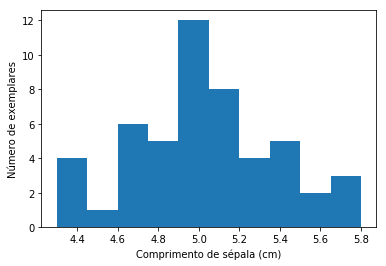

In [32]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
# Para escolher o número de caixas:
plt.hist(X[0:50,0], bins=10)
# Para escolher a largura da caixa:
#binwidth = 0.2
#plt.hist(X[0:50,0], bins=np.arange(min(X[0:50,0]), max(X[0:50,0]) + binwidth, binwidth))
ax2.set_xlabel('Comprimento de sépala (cm)')
ax2.set_ylabel('Número de exemplares')